## <font color= 'red'> Ciclo 00 - Planejamento - Metodo IOT

## <font color= 'red'> Ciclo 01 - Métricas de Validação de Clusters

1. Feature Engineering
    - Recencia
    - Frequencia
    - Monetização
    
    
2. Métricas de validação de Clustering
    - WSS (Within - Cluster Sum od Squate)
    - SS (Silhouette Score)
    
    
3. Cluster Analysis
    - Plot 3d
    - Cluster Profile

## <font color= 'red'> Ciclo 02 - Analise de Silhouette

1. Feature Engineering
    - Average Ticket
    
    
2. Análise de Silhouette
    - Silhouette Analysis
    
    
3. Cluster Visualization
    - UMAP
    
    
4. Cluster Analise de Perfil
    - Descrição dos Centróides

## <font color= 'red'> Ciclo 03 - Statistical Descriptive

1. Análise Descritiva
    - Atributos numéricos
    - Atributos categóricos
    
    
2. Feature Engineering
    - Avarege Recency
    - Number of Returns
    
    
3. Data Preparation
    - Standard Scaler

# Planejamento da Solução (IOT)

###### - Input (Entrada).
    a - Problema de Negocio
    b - Questões que serão respondidas
    c - Dados de entrada / Fonte  de Dados
    
###### - Output( Saída ).
    a - Anásile de dados
    b - Algoritmo de Machine Learning treinado
    c - Dashboard
    
###### - Tasks (Tarefas).
    a - Plano de Execução
    b - Ferramentas
    

# PA005 : High Value Customer Identification (Insiders)

## 0.0. Planejamento da solução (IOT)

### Input - Entrada

1. Problema de Negócio
    - Selecionar os clientes mais valiosos para integrar um programa de Fidelização
    
2. Conjunto de dados
    - Vendas de um e-commerce online, durante o periodo de um ano.

### Output - Saída

1. A indicação das pessoas que farão parte do programa de Insiders
 - Lista:   client_id | is_insider|
    
               10323 | yes/1
               32413 | no/0

### Tasks - Tarefas

1. Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - O que é ser elegivel? O que são clientes de maior "Valor".
        
        - Faturamento
        
            - Alto Ticket Médio
            - Alto LTV ( Life time value )
            - Baixa Recência
            - Alto basket size
            - Baixa probabilidade de churn.
            - Previsão de LTV
            - Alta propensão de compra.
            
        - Custo
        
            - Baixo taxa de devolução
            
        - Experiência de compra
        
            - Média alta das avaliações
    
2. Quantos Clientes farão parte do grupo ?
    - Número total de clientes
    - % de Insiders
    
3. Quais as principais caracteristicas desses clientes ?
    - Escrever caracteristivas do cliente
    
        - Idade
        - Localização
        
    - Escrever caracteristicas de consumo
    
        - Atributos da clusterização
        
4. Qual a porcentagem de contribuição do faturamento desse grupo para os proximos mese ?
    - Faturamento total do ano
    - Faturamento do grupo Insiders
    
5. Qual a expectativa de faturamento desse grupo para os proximos meses ?
    - LTV do grupo Insiders
    - Analise de Cohort
    
6. Quais as condições para uma pessoa ser elegivel ao Insiders ?
    - Definir a periodicidade (1 mes, 3 meses)
    - A pessoa precisa ser similar ou pareceido com uma pessoa do grupo.
    
7. Quais as condições para uma pessoa ser removida do Insiders ?
    - Definir a periodicidade (1 mes, 3 meses)
    - A pessoa precisa ser desimilar ou não pareceido com uma pessoa do grupo.
    
8. Qual a garantia que o programa Insiders é melhor que o restante da base?
    - Teste A/B
    - Teste A/B Bayesiano
    - Teste de hipóteses.
    
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
    - Desconto
    - Preferencia de compra
    - Frete
    - Visista a empresa

# <font color='red'> 1.0. Imports </font>

In [388]:
pip install umap-learn



  Using cached numpy-1.21.6-cp39-cp39-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\luizf\\anaconda3\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [389]:
import pandas as pd
import seaborn as sns
import inflection
import warnings
import regex as re

import umap

#import umap.umap_ as umap
from sklearn import cluster as cl
from sklearn import preprocessing as pp
from sklearn import metrics as m
from sklearn import decomposition as dd
from sklearn.manifold import TSNE

from sklearn.cluster import DBSCAN


from matplotlib import pyplot as plt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from IPython.display import HTML

from ydata_profiling import ProfileReport

from plotly import express as px

ImportError: Numba needs NumPy 1.21 or less

## 0.1. Help Functions

In [228]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
warnings.filterwarnings( 'ignore' )    

## 0.2 Load Dataset

In [229]:
df_raw = pd.read_csv('Ecommerce.csv',encoding='unicode_escape')

In [230]:
df_raw

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France,NaN


In [231]:
#Excluindo a coluna unnamed
df_raw.drop(columns=['Unnamed: 8'], axis=1, inplace=True)

# <font color='red'> 2.0. Descrição dos dados. </font>

In [232]:
df1 = df_raw.copy()

## 2.1. Rename Columns

In [233]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [234]:
cols_old = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate','UnitPrice', 'CustomerID', 'Country']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

In [235]:
df1.sample()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
436699,574237,22158,3 HEARTS HANGING DECORATION RUSTIC,8,1-Nov-17,2.95,15551.0,United Kingdom


## 2.2. Data Dimensions

In [236]:
print(f'Numero de linhas: {df1.shape[0]}')
print(f'Numero de colunas: {df1.shape[1]}')

Numero de linhas: 541909
Numero de colunas: 8


## 2.3. Data types

In [237]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [238]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 2.4. Check NA

In [239]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 2.5. Replace NA

In [240]:
df_missing = df1.loc[df1['customer_id'].isna(), :]
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]

##### Verificando se existe algum invoice_no repetido entre as bases

In [241]:
missing_invoice = df_missing['invoice_no'].drop_duplicates().tolist()
missing_invoice[:10]

['536414',
 '536544',
 '536545',
 '536546',
 '536547',
 '536549',
 '536550',
 '536552',
 '536553',
 '536554']

In [242]:
df_not_missing.loc[df_not_missing['invoice_no'].isin(missing_invoice), :].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country


- Não existe invoice_no correspondente

##### Create Reference

In [243]:
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange(19000, 19000+len(df_backup), 1)

In [244]:
df_backup.head()

,invoice_no,customer_id
622,536414,19000
1443,536544,19001
1970,536545,19002
1971,536546,19003
1972,536547,19004


##### Merge original with reference dataframe

In [245]:
df1 = pd.merge(df1, df_backup,  on= 'invoice_no', how='left')
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id_x,country,customer_id_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


##### Coalesce

In [246]:
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id_x,country,customer_id_y,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN,17850.0


##### Drop Extra Columns

In [247]:
df1 = df1.drop(columns = ['customer_id_x', 'customer_id_y'], axis=1)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,United Kingdom,17850.0


In [248]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

In [249]:
#df1 = df1.dropna(subset=['description', 'customer_id'])

#print(f'{ (1 -df1.shape[0]/ df_raw.shape[0]) * 100:.2f} % dos dados foram removidos')

## 2.6. Change dtypes

In [250]:
#invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850.0


In [251]:
#customer_id
df1['customer_id'] = df1['customer_id'].astype(int)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


In [252]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int32
dtype: object

## 2.7. Descriptive Statistics

### 2.7.1 Numerical attributs

In [253]:
num_atributes = df1.select_dtypes(include=['int64', 'float64'])

cat_atributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [254]:
# central tendency - mean, median
ct1 = pd.DataFrame(num_atributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_atributes.apply(np.median)).T

#dispersion - desvio padrão, minimo, range, skew, kurtosis
d1 = pd.DataFrame(num_atributes.apply(np.std)).T
d2 = pd.DataFrame(num_atributes.apply(np.min)).T
d3 = pd.DataFrame(num_atributes.apply(np.max)).T
d4 = pd.DataFrame(num_atributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_atributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_atributes.apply(lambda x: x.kurtosis())).T


#concatenate
c = pd.concat([d2, d3, d4, ct1, ct2, d2, d5, d6]).T.reset_index()
c.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [255]:
c

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,-80995.00,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,-11062.06,186.506972,59005.719097


#### 2.7.1.1 Numerical attributs investigating

- Podemos ver que na quantida temos um valor negativo (**pode ser devolução**)
- Quantidade máxima, temos uma pessoa que comprou 80995 produtos
- Valor unitário, temos o valor de 0

In [256]:
cat_atributes.head()

,invoice_no,stock_code,description,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,17850


In [257]:
#invoice number

len(df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), 'invoice_no'].drop_duplicates())

3839

In [258]:
#stock Code
#len(df1.loc[df1['stock_code'].apply(lambda x: bool(re.search('[^0-9]+', x))), 'stock_code'].drop_duplicates())

df1.loc[df1['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), :].head(20)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
45,536370,POST,POSTAGE,3,2016-11-29,18.00,France,12583
141,C536379,D,Discount,-1,2016-11-29,27.50,United Kingdom,14527
386,536403,POST,POSTAGE,1,2016-11-29,15.00,Netherlands,12791
1123,536527,POST,POSTAGE,1,2016-11-29,18.00,Germany,12662
1814,536544,DOT,DOTCOM POSTAGE,1,2016-11-29,569.77,United Kingdom,19001
2239,536569,M,Manual,1,2016-11-29,1.25,United Kingdom,16274
2250,536569,M,Manual,1,2016-11-29,18.95,United Kingdom,16274
3041,536592,DOT,DOTCOM POSTAGE,1,2016-11-29,607.49,United Kingdom,19014
5073,536840,POST,POSTAGE,1,2016-11-30,18.00,Germany,12738
5258,536852,POST,POSTAGE,1,2016-12-01,18.00,France,12686


### 2.7.2. Categorical Attributes

##### invoice_no

In [259]:
# problema: Temos invoice_no com letras e numeros

df_letter_invoice = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))), :]
df_letter_invoice.head()

print(f'Total number of invoices: {len(df_letter_invoice)}')
print(f'Total number of negative quantity: {len(df_letter_invoice.query("quantity < 0"))}')

Total number of invoices: 9291
Total number of negative quantity: 9288


##### stock_code

In [260]:
# check stock code only characters

print(df1.loc[df1['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))), 'stock_code'].unique())
#sotck_code != [post, D, M, DOT, CRUK]


['POST' 'D' 'DOT' 'M' 'S' 'AMAZONFEE' 'm' 'DCGSSBOY' 'DCGSSGIRL' 'PADS'
 'B' 'CRUK']


##### Descripition

##### Country

In [261]:
df1['country'].value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

# <font color='red'> 3.0. Filtragem de Variáveis </font>

In [262]:
df2 = df1.copy()

#### Numerical Attributes

In [263]:
df2 = df2.loc[df2['unit_price'] >= 0.04, :]

#### Categorical Attributes

In [264]:
#sotck_code != [post, D, M, DOT, CRUK]

df2 = df2[~df2['stock_code'].isin(['POST' 'D' 'DOT' 'M' 'S' 'AMAZONFEE' 'm' 'DCGSSBOY' 'DCGSSGIRL' 'PADS'
 'B' 'CRUK'])]

In [265]:
#Descripition
df2= df2.drop(columns='description', axis=1)

In [266]:
#Country
df2 = df2[~df2['country'].isin(['European Community', 'Unspecified'])]

In [267]:
#bad users
df2 = df2[~df2['customer_id'].isin([16446])]

In [268]:
df2_returns = df2.loc[df2['quantity'] < 0, :]
df2_purchases = df2.loc[df2['quantity'] >= 0, :]

In [269]:
df2_returns

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
141,C536379,D,-1,2016-11-29,27.50,United Kingdom,14527
154,C536383,35004C,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,-24,2016-11-29,0.29,United Kingdom,17548
...,...,...,...,...,...,...,...
540449,C581490,23144,-11,2017-12-07,0.83,United Kingdom,14397
541541,C581499,M,-1,2017-12-07,224.69,United Kingdom,15498
541715,C581568,21258,-5,2017-12-07,10.95,United Kingdom,15311
541716,C581569,84978,-1,2017-12-07,1.25,United Kingdom,17315


# <font color='red'> 4.0. Feature Enginering </font>

## 4.1. Feature Creation

In [270]:
df2

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850
...,...,...,...,...,...,...,...
541904,581587,22613,12,2017-12-07,0.85,France,12680
541905,581587,22899,6,2017-12-07,2.10,France,12680
541906,581587,23254,4,2017-12-07,4.15,France,12680
541907,581587,23255,4,2017-12-07,4.15,France,12680


In [271]:
df_ref = df2[['customer_id']].drop_duplicates(ignore_index=True)
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


### Gross Revenue

In [272]:
#Faturamento = Quantity * price
df2_purchases['gross_revenue'] = df2_purchases['quantity'] * df2_purchases['unit_price']


#Monetary
df2_purchases[['customer_id', 'gross_revenue']].head()


df_monetary = df2_purchases[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()

#merge com o df_ref

df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
df_ref.isna().sum()


customer_id        0
gross_revenue    215
dtype: int64

### Recency

In [273]:
#Recency
df_recency = df2_purchases[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2_purchases['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()


df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')
df_ref.isna().sum()


customer_id        0
gross_revenue    215
recency_days     215
dtype: int64

### quantity of purchased

In [274]:
df_frequency = (df2_purchases[['customer_id', 'invoice_no']].drop_duplicates()
                                                            .groupby('customer_id')
                                                            .count()
                                                            .reset_index()
                                                            .rename(columns={'invoice_no': 'qtde_invoices'}))
df_frequency.head()
                                                                             

,customer_id,qtde_invoices
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [275]:
df_frequency = df2_purchases[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_frequency.head()

,customer_id,invoice_no
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [276]:
df_ref = pd.merge(df_ref, df_frequency, on='customer_id', how='left')
df_ref.isna().sum()


customer_id        0
gross_revenue    215
recency_days     215
invoice_no       215
dtype: int64

### Quantity of items purchased


In [277]:
df_frequency = (df2_purchases[['customer_id', 'quantity']].groupby('customer_id')
                                                          .sum()
                                                          .reset_index()
                                                          .rename(columns={'quantity': 'qtde_items'}))
df_frequency.head()
                        

,customer_id,qtde_items
0,12346,74215
1,12347,2458
2,12348,2341
3,12349,631
4,12350,197


In [278]:
df_ref = pd.merge(df_ref, df_frequency, on='customer_id', how='left')
df_ref.isna().sum()


customer_id        0
gross_revenue    215
recency_days     215
invoice_no       215
qtde_items       215
dtype: int64

### Quantity of products purchased


In [279]:
df_freq = (df2_purchases.loc[:, ['customer_id', 'stock_code']].groupby('customer_id').nunique()
                                                              .reset_index()
                                                              .rename(columns={'stock_code': 'qtde_produto'}))
df_freq

,customer_id,qtde_produto
0,12346,1
1,12347,103
2,12348,22
3,12349,73
4,12350,17
...,...,...
5750,22705,2
5751,22706,635
5752,22707,731
5753,22708,56


In [280]:
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_ref.isna().sum()

customer_id        0
gross_revenue    215
recency_days     215
invoice_no       215
qtde_items       215
qtde_produto     215
dtype: int64

### AVG Ticket Value

In [281]:
df_avg_ticket = df2_purchases[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue' : 'avg_ticket'})
df_avg_ticket.head()


,customer_id,avg_ticket
0,12346,77183.600000
1,12347,23.681319
2,12348,57.975484
3,12349,24.076027
4,12350,19.670588


In [282]:
df_ref = pd.merge(df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()


customer_id        0
gross_revenue    215
recency_days     215
invoice_no       215
qtde_items       215
qtde_produto     215
avg_ticket       215
dtype: int64

###  Average Recency Days

In [283]:
df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values(['customer_id','invoice_date'], ascending=[True, True])
df_aux['next_customer_id'] = df_aux['customer_id'].shift()
df_aux['previous_date'] = df_aux['invoice_date'].shift()

df_aux['avg_recency_days'] = df_aux.apply(lambda x: (x['invoice_date'] - x['previous_date']).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1)


df_aux = df_aux.drop(['invoice_date', 'next_customer_id', 'previous_date'], axis=1).dropna()

df_avg_recency_days = df_aux.groupby('customer_id').mean().reset_index()


df_ref = pd.merge(df_ref, df_avg_recency_days, on='customer_id', how='left')
df_ref.isna().sum()

customer_id            0
gross_revenue        215
recency_days         215
invoice_no           215
qtde_items           215
qtde_produto         215
avg_ticket           215
avg_recency_days    2984
dtype: int64

### Frequency Purchase


In [284]:
df_aux = (df2_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                            .groupby('customer_id')
                                                            .agg(max_ = ('invoice_date', 'max'),
                                                                 min_ = ('invoice_date', 'min'),
                                                                 days_ = ('invoice_date', lambda x:( (x.max() - x.min()).days)+1),
                                                                 buy_ = ('invoice_no', 'count'))).reset_index()
          
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply(lambda x: x['buy_'] / x['days_'] if x['days_'] != 0 else 0, axis=1)

df_ref = pd.merge(df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left')
df_ref.isna().sum()

customer_id            0
gross_revenue        215
recency_days         215
invoice_no           215
qtde_items           215
qtde_produto         215
avg_ticket           215
avg_recency_days    2984
frequency            215
dtype: int64

In [285]:
df_aux.sort_values('frequency', ascending=False).head()

,customer_id,max_,min_,days_,buy_,frequency
4010,17850,2016-11-30,2016-11-29,2,34,17.0
2763,16120,2017-10-09,2017-10-09,1,4,4.0
2622,15920,2017-07-06,2017-07-06,1,4,4.0
2008,15098,2017-06-08,2017-06-08,1,3,3.0
2674,16000,2017-12-05,2017-12-05,1,3,3.0


### <font color = 'green'> Number of Returns


In [286]:
df_returns = df2_returns[['customer_id', 'quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'qtde_returns'})
df_returns['qtde_returns'] = df_returns['qtde_returns']* -1

df_ref = pd.merge(df_ref, df_returns, how='left', on='customer_id')
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns']=0
df_ref.isna().sum()

customer_id            0
gross_revenue        215
recency_days         215
invoice_no           215
qtde_items           215
qtde_produto         215
avg_ticket           215
avg_recency_days    2984
frequency            215
qtde_returns           0
dtype: int64

### <font color = 'green'> Basket Size

In [287]:
df_aux = (df2_purchases.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
                                                                         .agg(n_purchases = ('invoice_no', 'nunique'),
                                                                              n_products = ('quantity', 'sum'))
                                                                         .reset_index())

df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchases']


df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id            0
gross_revenue        215
recency_days         215
invoice_no           215
qtde_items           215
qtde_produto         215
avg_ticket           215
avg_recency_days    2984
frequency            215
qtde_returns           0
avg_basket_size      215
dtype: int64

### <font color = 'green'> Variaty of product


In [288]:
df_aux = (df2_purchases.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby('customer_id')
                                                                         .agg(n_purchases = ('invoice_no', 'nunique'),
                                                                              n_products = ('stock_code', 'nunique'))
                                                                         .reset_index())

df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchases']


df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id                  0
gross_revenue              215
recency_days               215
invoice_no                 215
qtde_items                 215
qtde_produto               215
avg_ticket                 215
avg_recency_days          2984
frequency                  215
qtde_returns                 0
avg_basket_size            215
avg_unique_basket_size     215
dtype: int64

In [289]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no,qtde_items,qtde_produto,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,21.0,18.152222,35.500000,17.000000,40.0,50.970588,0.617647
1,13047,3237.54,31.0,10.0,1391.0,106.0,18.822907,26.307692,0.029155,36.0,139.100000,10.600000
2,12583,7281.38,2.0,15.0,5060.0,115.0,29.479271,21.823529,0.040323,51.0,337.333333,7.666667
3,13748,948.25,95.0,5.0,439.0,24.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,1.0,292.000000,8.600000,0.073171,22.0,26.666667,0.333333


In [290]:
df3 = df_ref.dropna().copy()

# <font color='red'> 5.0. EDA </font>

## 4.1. Univariate Analysis

**Notes**
    
    1. Clusters Coesos - Separados
    2. Métricas
        - Min, Máximo, Range(Dispersão)
        - Média e Mediana
        - Desvio Padrão
        - Coeficiente de Variação (CV)
        - Distribuição

In [291]:
#profile = ProfileReport(df3)
#profile.to_file('output.html')

### 4.1.1. Gross Revenue - OK


In [292]:
df3[['gross_revenue']].describe()

,gross_revenue
count,2984.000000
mean,2726.911387
std,10195.376976
min,6.200000
25%,573.055000
50%,1097.375000
75%,2329.457500
max,280206.020000


<AxesSubplot:xlabel='gross_revenue', ylabel='Count'>

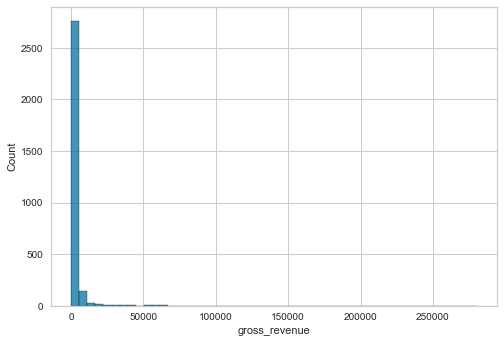

In [293]:
sns.histplot(df3['gross_revenue'],bins=50)

In [294]:
df2[df2['customer_id'] == 14646].head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
37952,539491,21981,12,2016-12-18,0.29,Netherlands,14646
37953,539491,21986,12,2016-12-18,0.29,Netherlands,14646
37954,539491,22720,2,2016-12-18,4.95,Netherlands,14646
37955,539491,21931,1,2016-12-18,1.95,Netherlands,14646
37956,539491,22613,2,2016-12-18,0.85,Netherlands,14646


### 4.1.2. Recency Days 

In [295]:
df3[['recency_days']].describe()

,recency_days
count,2984.000000
mean,64.494638
std,77.770220
min,0.000000
25%,11.000000
50%,32.000000
75%,82.000000
max,373.000000


<AxesSubplot:xlabel='recency_days', ylabel='Count'>

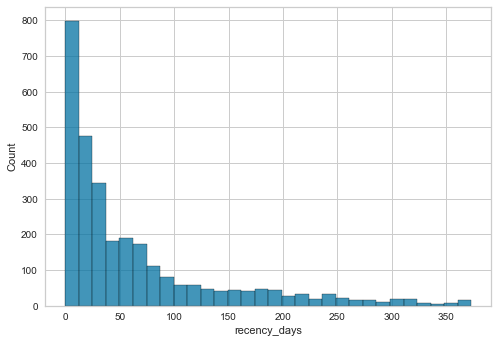

In [296]:
sns.histplot(df3['recency_days'],bins=30)

### 4.1.3. AVG Ticket 


In [297]:
df3[['avg_ticket']].describe()

,avg_ticket
count,2984.000000
mean,32.941300
std,111.286119
min,2.150588
25%,13.151965
50%,18.181007
75%,25.310879
max,4453.430000


- Temos um AVG Ticket muito alto 56157.50

In [298]:
df3[df3['avg_ticket'] ==  56157.50]

,customer_id,gross_revenue,recency_days,invoice_no,qtde_items,qtde_produto,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size


In [299]:
df2[df2['customer_id'] == 16446]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id


- Dá para ver que a mercadoria não chegou a sair da loja poir o invoice_no é seguido, o de compra como o de devolução
- Vamos remover da base de dados pois pode ter sido um erro do sistema

## 4.2. Bivariate Analysis

In [300]:
cols = ['customer_id']
df32 = df3.drop(cols, axis=1)

<Figure size 1800x864 with 0 Axes>

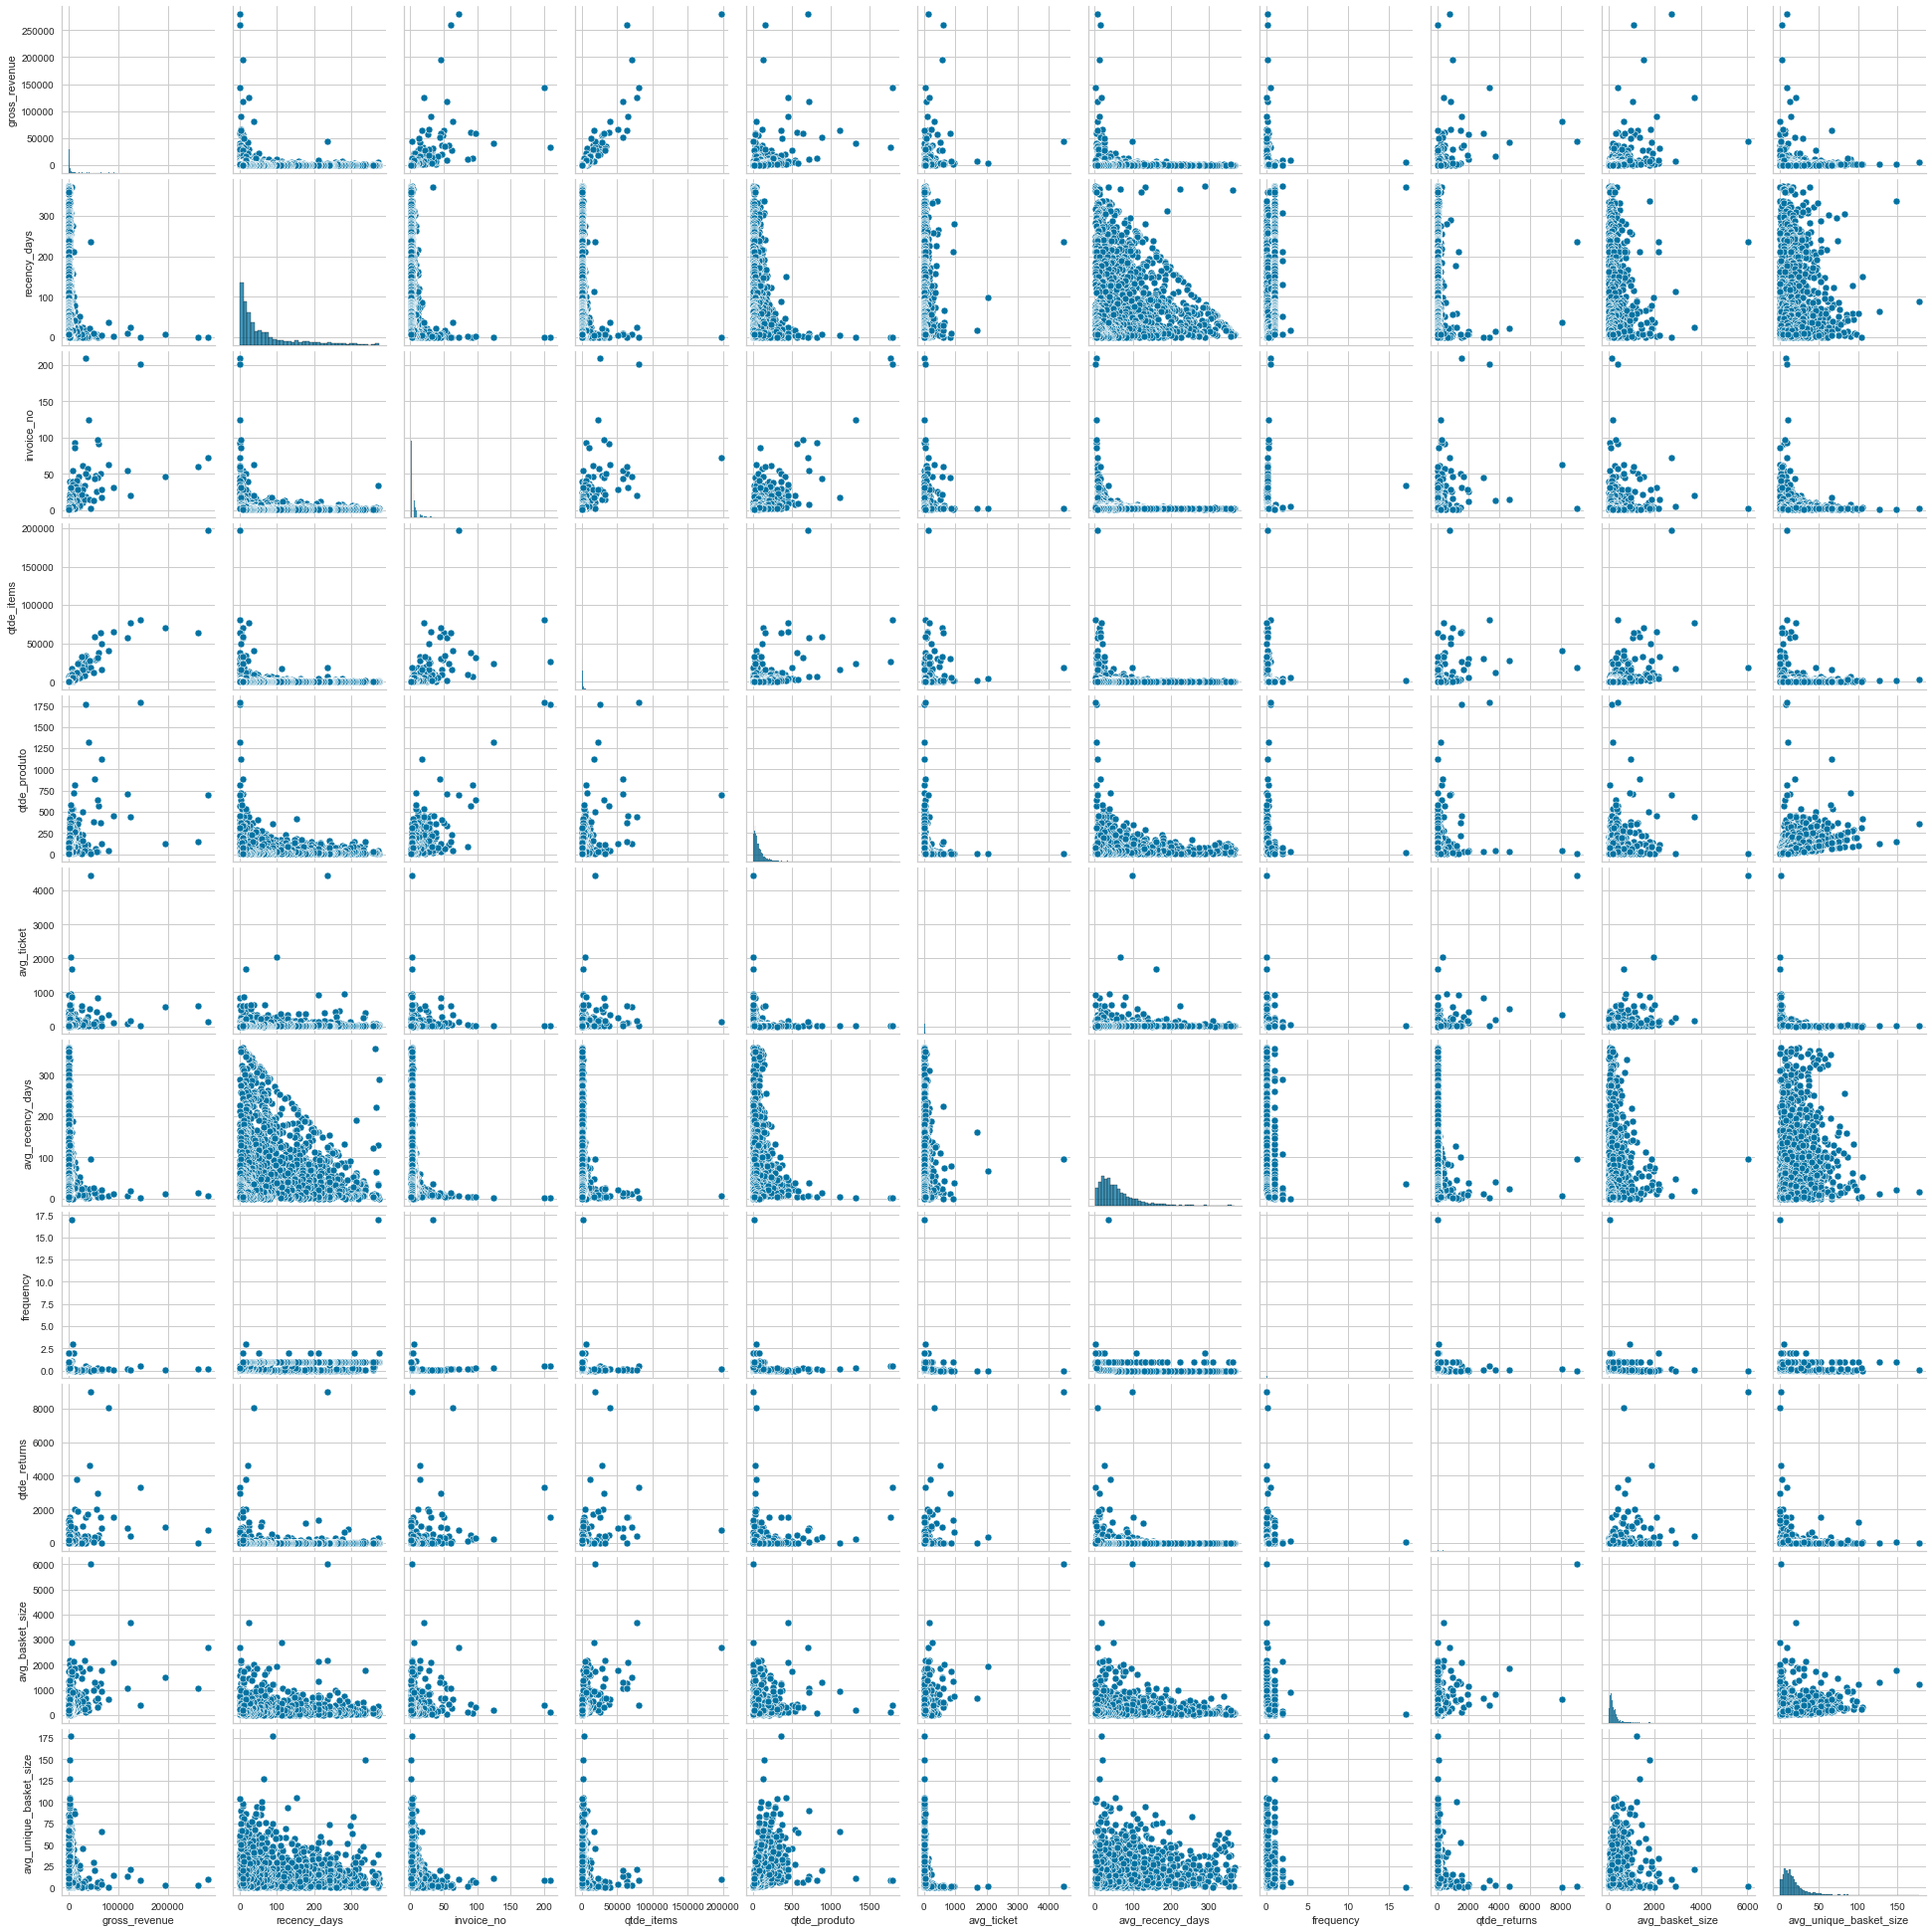

In [301]:
plt.figure(figsize=(25,12))
sns.pairplot(df32)

**Notas**
- Frequencia possui pouca variação
- Avg ticket
- 

## <font color = 'green' >  4.3. Estudo do Espaço

In [302]:
df4 = df3.copy()

In [303]:
from sklearn import preprocessing as pp

In [304]:
df41 = df4.drop(cols, axis=1)
mm = pp.MinMaxScaler()

#
df41['gross_revenue'] = mm.fit_transform(df41[['gross_revenue']])
df41['recency_days'] = mm.fit_transform(df41[['recency_days']])
df41['invoice_no'] = mm.fit_transform(df41[['invoice_no']])
df41['qtde_produto'] = mm.fit_transform(df41[['qtde_produto']])
df41['qtde_items'] = mm.fit_transform(df41[['qtde_items']])
df41['avg_ticket'] = mm.fit_transform(df41[['avg_ticket']])
df41['avg_recency_days'] = mm.fit_transform(df41[['avg_recency_days']])
df41['frequency'] = mm.fit_transform(df41[['frequency']])
df41['qtde_returns'] = mm.fit_transform(df41[['qtde_returns']])
df41['avg_basket_size'] = mm.fit_transform(df41[['avg_basket_size']])
df41['avg_unique_basket_size'] = mm.fit_transform(df41[['avg_unique_basket_size']])

X = df41.copy()


In [305]:
X.shape[1]

11

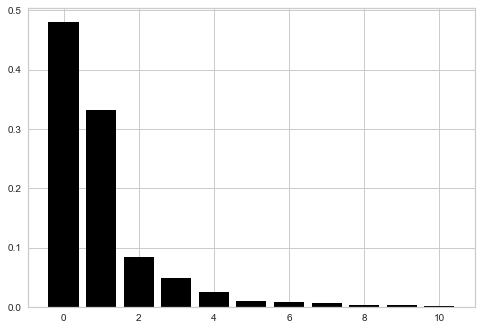

In [306]:
pca = dd.PCA(n_components=X.shape[1])

principal_components = pca.fit_transform(X)

#plot explained variable
features = range(pca.n_components_)

plt.figsize=(16,8)

plt.bar(features, pca.explained_variance_ratio_, color='black')

#pca_components
df_pca = pd.DataFrame(principal_components)

In [307]:
df_pca

,0,1,2,3,4,5,6,7,8,9,10
0,0.857473,-0.036422,-0.052104,0.132055,-0.074315,-0.031179,0.208624,0.934553,-0.152803,0.009899,0.000423
1,-0.079010,-0.122354,-0.033356,0.003120,-0.020436,0.005449,-0.000143,-0.003583,-0.000198,0.000293,0.001740
2,-0.156859,-0.146570,-0.042162,0.037071,-0.000817,-0.002362,-0.011627,0.005027,0.013162,-0.003092,-0.001134
3,0.077739,0.076872,-0.078836,0.006152,-0.012626,-0.000172,-0.000012,-0.006387,0.001454,0.001002,-0.000106
4,0.735207,-0.091074,-0.076408,0.032652,-0.013384,0.021183,-0.003790,-0.031542,-0.010850,0.046273,-0.009112
...,...,...,...,...,...,...,...,...,...,...,...
2979,-0.120977,-0.176379,0.062366,-0.073748,0.050968,-0.012781,0.022371,0.050412,0.001142,-0.002537,-0.000145
2980,-0.128498,-0.187595,-0.083882,-0.041986,0.022701,-0.003221,0.012551,0.035073,-0.014405,-0.002078,-0.000966
2981,-0.168423,-0.164756,0.491807,-0.122111,-0.019712,0.001271,0.061713,-0.002461,-0.001410,0.032486,-0.012080
2982,-0.127072,-0.191318,0.008002,-0.056358,-0.007148,-0.007051,0.038981,0.100983,-0.035488,0.001650,-0.003548


<AxesSubplot:xlabel='0', ylabel='1'>

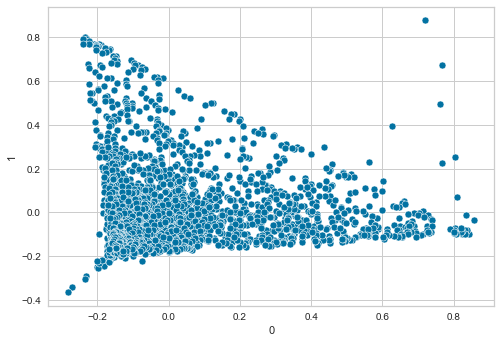

In [308]:
sns.scatterplot(x=0, y = 1, data=df_pca)

### <font color='green'> 4.3.1 t-SNE

<AxesSubplot:xlabel='embedding_x2', ylabel='embedding_y2'>

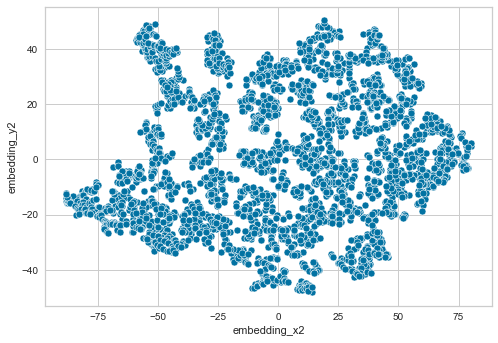

In [309]:
reducer = TSNE(n_components=2, 
            random_state=42,
            n_jobs=-1)

#embedding

embedding = reducer.fit_transform(X )


df_pca['embedding_x2'] = embedding[:,0]
df_pca['embedding_y2'] = embedding[:,1]

#plot
sns.scatterplot(x='embedding_x2', 
                y='embedding_y2',  
                data = df_pca)

### <font color='green'> 4.3.2 Tree-Based Embedding

In [390]:
from sklearn import ensemble as en

In [391]:
df4

,customer_id,gross_revenue,recency_days,invoice_no,qtde_items,qtde_produto,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,21.0,18.152222,35.500000,17.000000,40.0,50.970588,0.617647
1,13047,3237.54,31.0,10.0,1391.0,106.0,18.822907,26.307692,0.029155,36.0,139.100000,10.600000
2,12583,7281.38,2.0,15.0,5060.0,115.0,29.479271,21.823529,0.040323,51.0,337.333333,7.666667
3,13748,948.25,95.0,5.0,439.0,24.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,1.0,292.000000,8.600000,0.073171,22.0,26.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
5839,12479,527.20,11.0,1.0,385.0,31.0,17.006452,4.000000,1.000000,34.0,385.000000,31.000000
5860,14126,706.13,7.0,3.0,508.0,14.0,47.075333,3.000000,0.750000,50.0,169.333333,4.666667
5866,13521,1093.65,1.0,3.0,736.0,313.0,2.508372,4.500000,0.300000,0.0,245.333333,104.333333
5876,15060,303.09,8.0,4.0,263.0,81.0,2.504876,1.000000,2.000000,0.0,65.750000,20.250000


In [312]:
#training dataset
X = df4.drop(columns=['gross_revenue'], axis=1)

y = df4['gross_revenue']

#model definition
rf_model = en.RandomForestRegressor(n_estimators=100, random_state=42)

#model training
rf_model.fit(X,y)


#Leaf(folhas)
df_leaf = pd.DataFrame(rf_model.apply(X))


<AxesSubplot:xlabel='embedding_x2', ylabel='embedding_y2'>

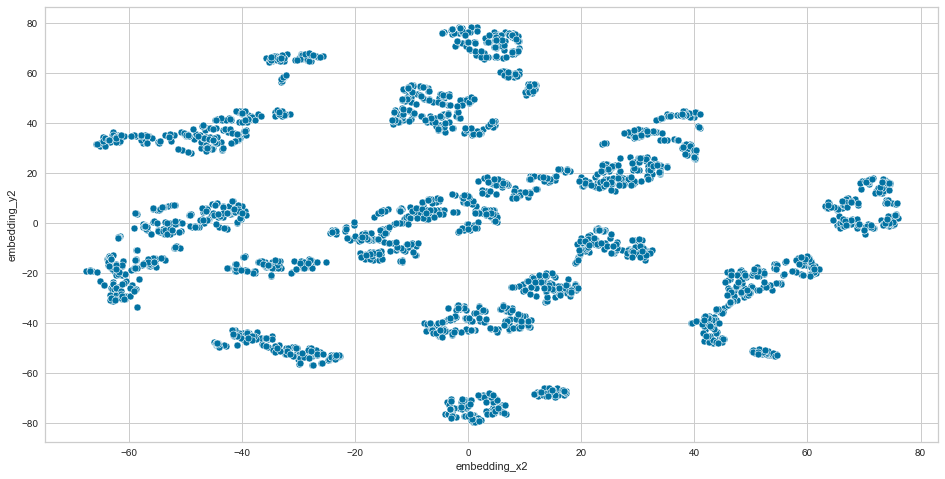

In [313]:
reducer = TSNE(n_components=2, 
            random_state=42,
            n_jobs=-1)

#embedding

embedding = reducer.fit_transform(df_leaf )


df_pca['embedding_x2'] = embedding[:,0]
df_pca['embedding_y2'] = embedding[:,1]

#plot
plt.figure(figsize=(16,8))
sns.scatterplot(x='embedding_x2', 
                y='embedding_y2',  
                data = df_pca)

# <font color='red'> 6.0. Data Preparation </font>

In [314]:
df5 = df3.copy()

In [315]:
df5

,customer_id,gross_revenue,recency_days,invoice_no,qtde_items,qtde_produto,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,21.0,18.152222,35.500000,17.000000,40.0,50.970588,0.617647
1,13047,3237.54,31.0,10.0,1391.0,106.0,18.822907,26.307692,0.029155,36.0,139.100000,10.600000
2,12583,7281.38,2.0,15.0,5060.0,115.0,29.479271,21.823529,0.040323,51.0,337.333333,7.666667
3,13748,948.25,95.0,5.0,439.0,24.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,1.0,292.000000,8.600000,0.073171,22.0,26.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
5839,12479,527.20,11.0,1.0,385.0,31.0,17.006452,4.000000,1.000000,34.0,385.000000,31.000000
5860,14126,706.13,7.0,3.0,508.0,14.0,47.075333,3.000000,0.750000,50.0,169.333333,4.666667
5866,13521,1093.65,1.0,3.0,736.0,313.0,2.508372,4.500000,0.300000,0.0,245.333333,104.333333
5876,15060,303.09,8.0,4.0,263.0,81.0,2.504876,1.000000,2.000000,0.0,65.750000,20.250000


##### Standard Scaler

In [316]:
ss = pp.StandardScaler()
rs = pp.RobustScaler()

In [317]:
df5.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'invoice_no',
       'qtde_items', 'qtde_produto', 'avg_ticket', 'avg_recency_days',
       'frequency', 'qtde_returns', 'avg_basket_size',
       'avg_unique_basket_size'],
      dtype='object')

In [318]:
mm = pp.MinMaxScaler()
df51 = df5.drop(cols, axis=1).copy()
for col in df51.columns:
    df51[col] = mm.fit_transform(df5[[col]])


In [320]:
df51['customer_id'] = df5['customer_id']
cols_select = ['customer_id', 'gross_revenue', 'recency_days', 'qtde_produto', 'frequency', 'qtde_returns']

In [321]:
df51.head()

,gross_revenue,recency_days,invoice_no,qtde_items,qtde_produto,avg_ticket,avg_recency_days,frequency,qtde_returns,avg_basket_size,avg_unique_basket_size,customer_id
0,0.019218,0.997319,0.158654,0.008796,0.011198,0.003595,0.094521,1.000000,0.004438,0.008317,0.002362,17850
1,0.011532,0.083110,0.043269,0.007059,0.058791,0.003746,0.069336,0.001395,0.003994,0.022985,0.058824,13047
2,0.025964,0.005362,0.067308,0.025691,0.063830,0.006140,0.057051,0.002052,0.005658,0.055978,0.042232,12583
3,0.003362,0.254692,0.019231,0.002224,0.012878,0.007125,0.251142,0.000734,0.000000,0.014447,0.026018,13748
4,0.003104,0.892761,0.009615,0.000401,0.000000,0.065116,0.020822,0.003985,0.002441,0.004272,0.000754,15100


##### Distribuição com os dados escalonados

<AxesSubplot:xlabel='gross_revenue', ylabel='Density'>

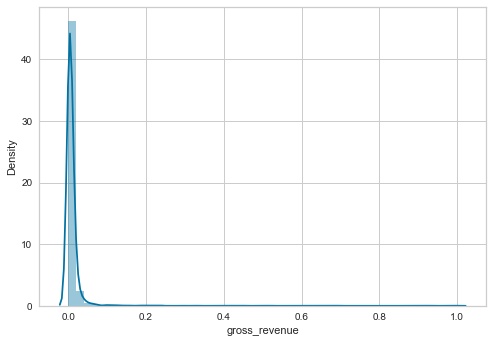

In [94]:
sns.distplot(df51['gross_revenue'])

##### Distribuição com os logs dos dados escalonados

In [322]:
#sns.distplot(np.log(df51['gross_revenue']))

In [323]:
df6 = df51[cols_select]

# <font color='red'> 7.0. Hyperparameter Fine-Tunning </font>

In [324]:
X = df6.drop(cols, axis=1).copy()

In [325]:
X.head()

,gross_revenue,recency_days,qtde_produto,frequency,qtde_returns
0,0.019218,0.997319,0.011198,1.000000,0.004438
1,0.011532,0.083110,0.058791,0.001395,0.003994
2,0.025964,0.005362,0.063830,0.002052,0.005658
3,0.003362,0.254692,0.012878,0.000734,0.000000
4,0.003104,0.892761,0.000000,0.003985,0.002441


In [326]:
clusters = [2, 3, 4, 5, 6, 7]

## 7.1. Kmeans

In [327]:
kmeans_list = []
for k in clusters:
    
    #model definition
    kmeans_model = cl.KMeans(n_clusters=k)
    
    #model training
    kmeans_model.fit(X)
    
    #model predict
    labels = kmeans_model.predict(X)
    
    #model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    kmeans_list.append(sil)

Text(0.5, 1.0, 'Silhouette Score x K')

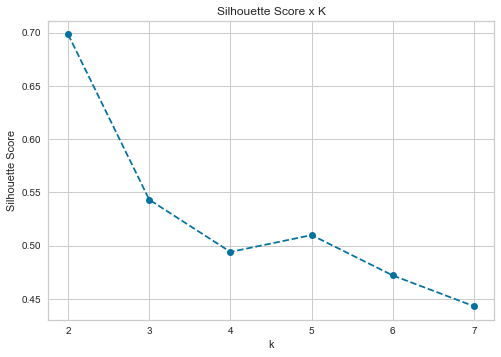

In [328]:
plt.plot(clusters, kmeans_list, linestyle='--', marker='o', color='b')
plt.xlabel('k');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K')

## 7.2. GMM

In [329]:
from sklearn import mixture as mx

In [330]:
gmm_list = []

for k in clusters:

    #model definition
    gmm_model = mx.GaussianMixture(n_components=k)
    
    #model training 
    gmm_model.fit(X)
    
    #model predict
    labels = gmm_model.predict(X)
    
    #model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    gmm_list.append(sil)

Text(0.5, 1.0, 'Silhouette Score x K')

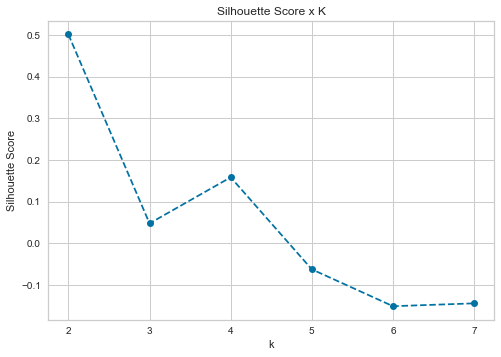

In [331]:
plt.plot(clusters, gmm_list, linestyle='--', marker='o', color='b')
plt.xlabel('k');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K')

## 7.3. Hierarchical Clustering

In [332]:
from scipy.cluster import hierarchy as hc

In [333]:
#model definition and training 
hc_model =hc.linkage(X, 'ward')

[]

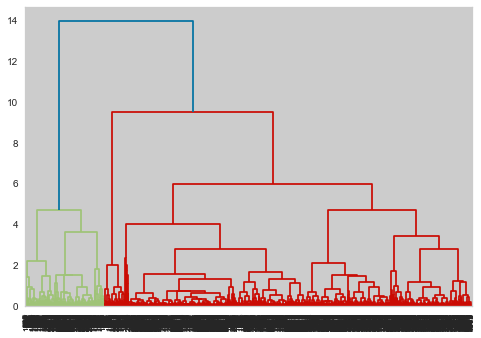

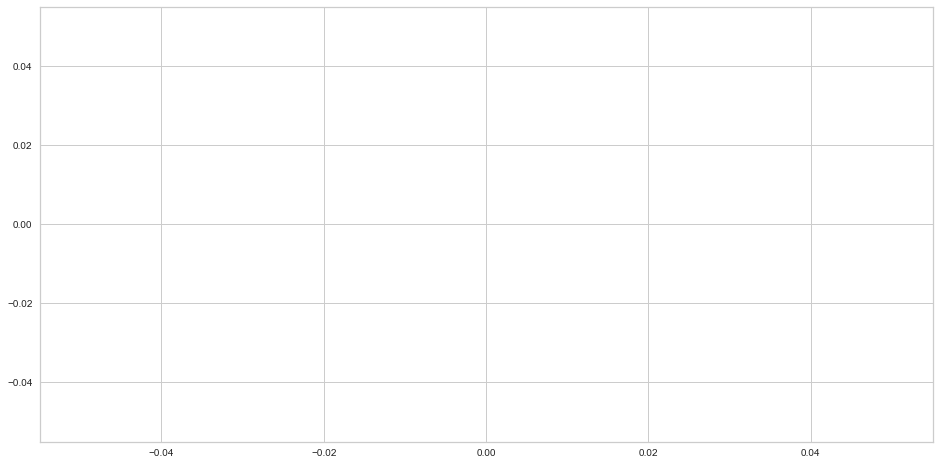

In [106]:
#hc.dendrogram(
#    hc_model,
#    leaf_rotation=90,
#    leaf_font_size=8)

#plt.figure(figsize=(16,8))

#plt.plot()

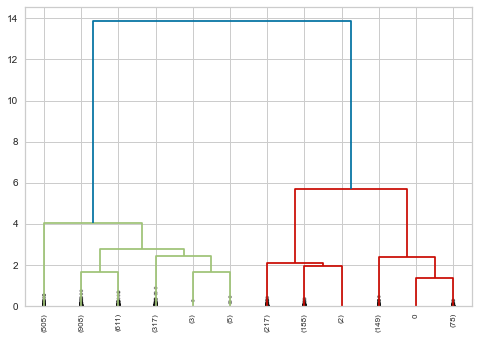

<Figure size 1152x576 with 0 Axes>

In [336]:
hc.dendrogram(
    hc_model,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90,
    leaf_font_size=8,
    show_contracted=True)

plt.figure(figsize=(16,8))

plt.show()

### 7.3.1. HClustering Silhouette Score

In [337]:
hc_list = []
for k in clusters:

    #model definition and training
    hc_model = hc.linkage(X, 'ward')

    #model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')

    #metrics
    sil = m.silhouette_score(X, labels, metric='euclidean')
    hc_list.append(sil)

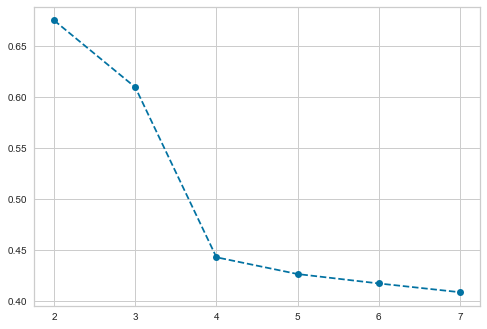

In [338]:
plt.plot(clusters, hc_list, linestyle='--', marker='o', color='b')

## 7.4. DBSCAN

In [342]:
eps=0.2
min_samples=20

#model definition
dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_model.fit(X)
#mode training and predict
labels = dbscan_model.labels_

sil = m.silhouette_score(X, labels, metric='euclidean')

print(f'Silhouette Score: {sil}')
print(f'Number of Clusters: {len(np.unique(labels))}')
print(np.unique(labels))

Silhouette Score: 0.741743562235061
Number of Clusters: 2
[-1  0]


In [117]:
from sklearn.neighbors import NearestNeighbors

In [343]:
neighbors = NearestNeighbors(n_neighbors = min_samples).fit(X)
distances, indices = neighbors.kneighbors(X)

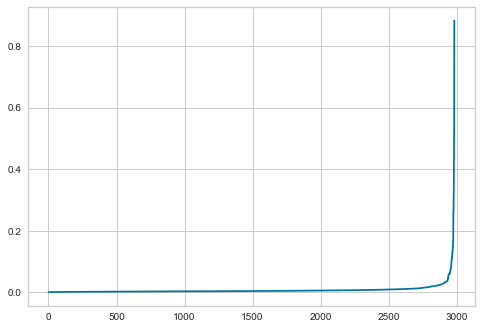

In [344]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

## 7.5. Results

In [138]:
df_results = pd.DataFrame(
{'Kmeans' : kmeans_list,
 'GMM' : gmm_list,
 'HC' : hc_list}
).T

df_results.columns = clusters

In [139]:
df_results.style.highlight_max(color='lightgreen', axis=1)

,2,3,4,5,6,7
Kmeans,0.981029,0.958684,0.939730,0.818710,0.743790,0.702750
GMM,0.982316,0.640670,0.204765,0.219094,-0.060598,-0.059938
HC,0.970544,0.965234,0.874130,0.875275,0.688005,0.693477


### 7.5.1. MinMaxSacaler

In [345]:
df_results2 = pd.DataFrame(
{'Kmeans' : kmeans_list,
 'GMM' : gmm_list,
 'HC' : hc_list}
).T

df_results2.columns = clusters

df_results2.style.highlight_max(color='lightgreen', axis=1)

,2,3,4,5,6,7
Kmeans,0.698315,0.543016,0.493969,0.509773,0.471876,0.442973
GMM,0.501299,0.047475,0.158136,-0.062893,-0.151369,-0.144487
HC,0.675253,0.609729,0.443137,0.426720,0.417506,0.408922


## 8.1. Within-Cluster Sum of Square (WSS)

Text(0.5, 1.0, 'WSS vs K')

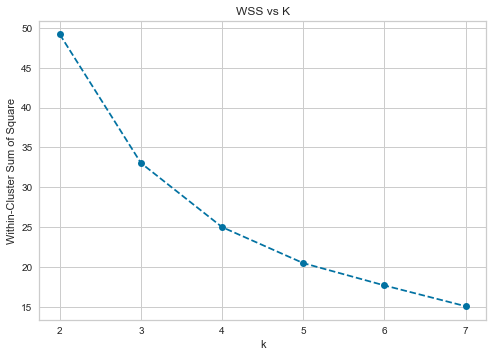

In [346]:
wss = []
for k in clusters:
    #model definition
    kmeans = cl.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    
    #model training
    kmeans.fit(X)
    
    #validation
    wss.append(kmeans.inertia_)
    
#plot wss
plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('k')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('WSS vs K')

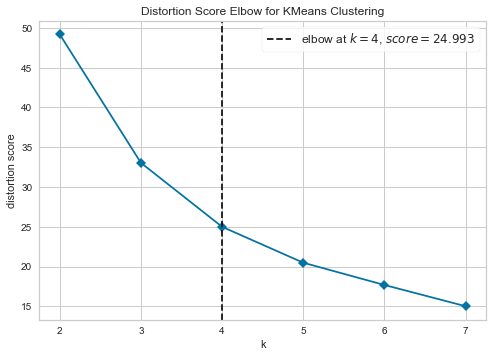

In [347]:
kmeans = KElbowVisualizer(cl.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show();

## 8.2. Silhouette Analysis

For K = 2. Silhouette Score: 0.9705436808605138


NameError: name 'cm' is not defined

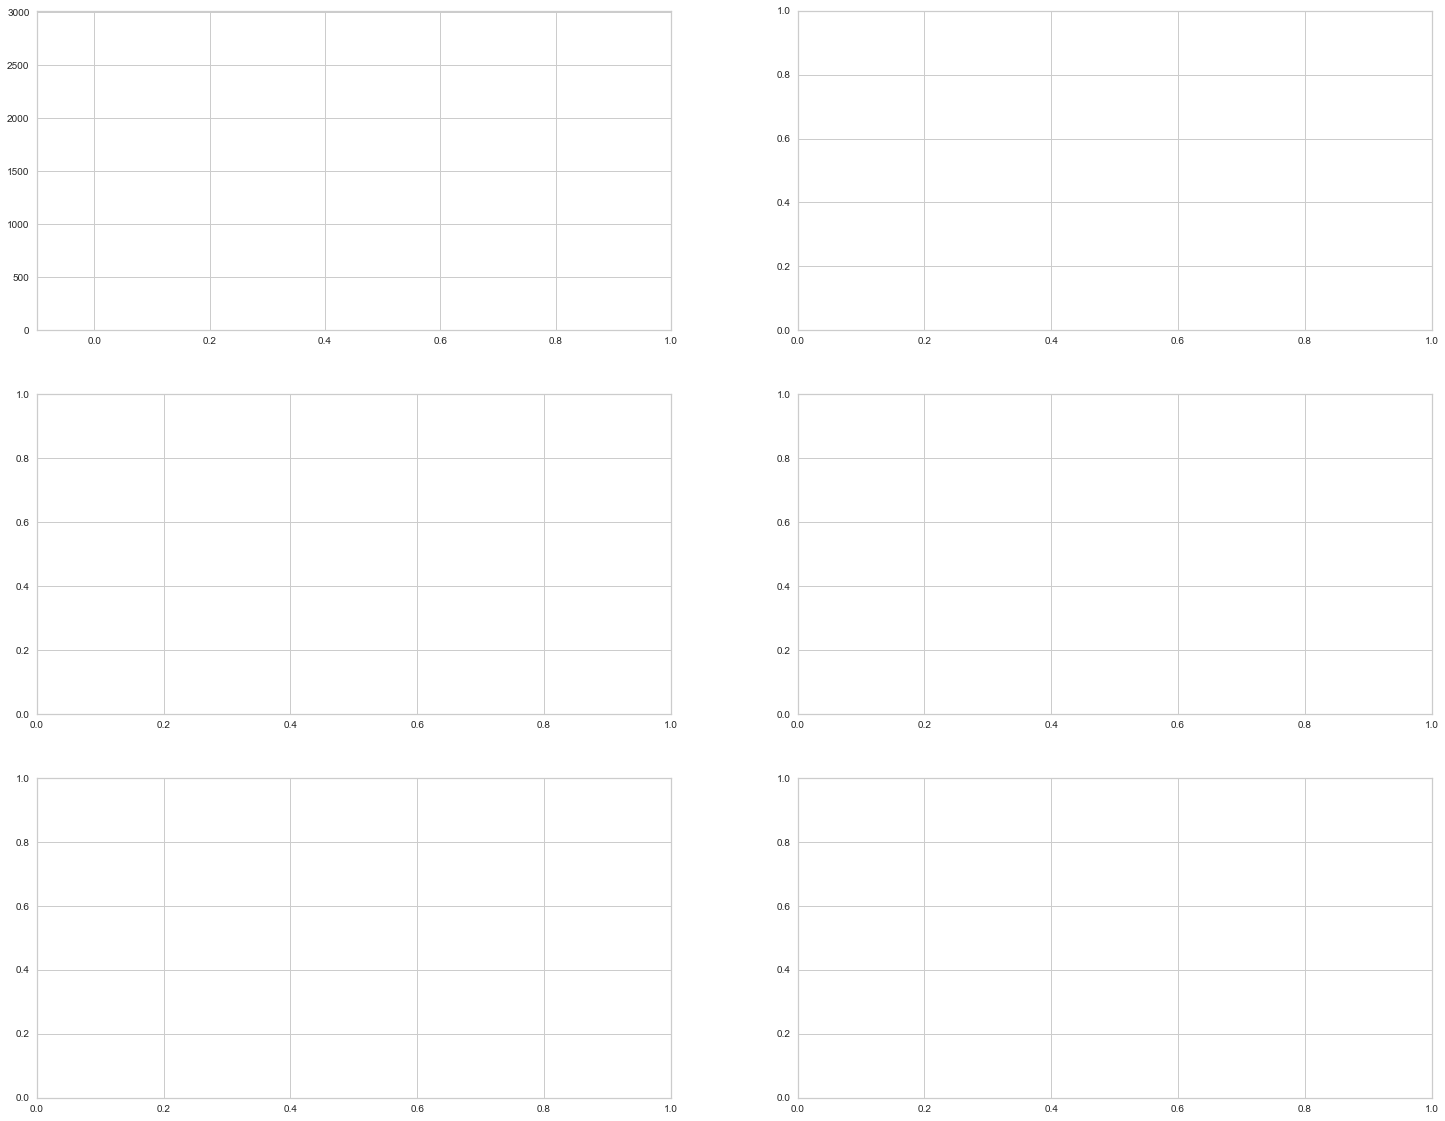

In [157]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(25, 20)

for k in clusters:
    q, mod = divmod(k, 2)
    
    ax[q-1, mod].set_xlim([-0.1, 1])
    ax[q-1, mod].set_ylim([0, len(X) + (k+1)*10])
    
    #model definition & training
    hc_model = hc.linkage(X, 'ward')
    
    #model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')
    
    #performance
    ss= m.silhouette_score(X, labels, metric='euclidean')
    print(f'For K = {k}. Silhouette Score: {ss}')
    
    samples_silhouette_values = m.silhouette_samples(X, labels)
    
    y_lower = 10
    for i in range(k):
        
        #select clusters
        ith_samples_silhouette_values = samples_silhouette_values[labels == i]
        
        #sort values
        ith_samples_silhouette_values.sort()
        
        #size clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap('Spectral')
        color = cmap(i / k)
        
        ax[q-1, mod].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_samples_silhouette_values)
        
        y_lower = y_upper + 10
        
    ax[q-1, mod].set_yticks([])
    ax[q-1, mod].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
        
        

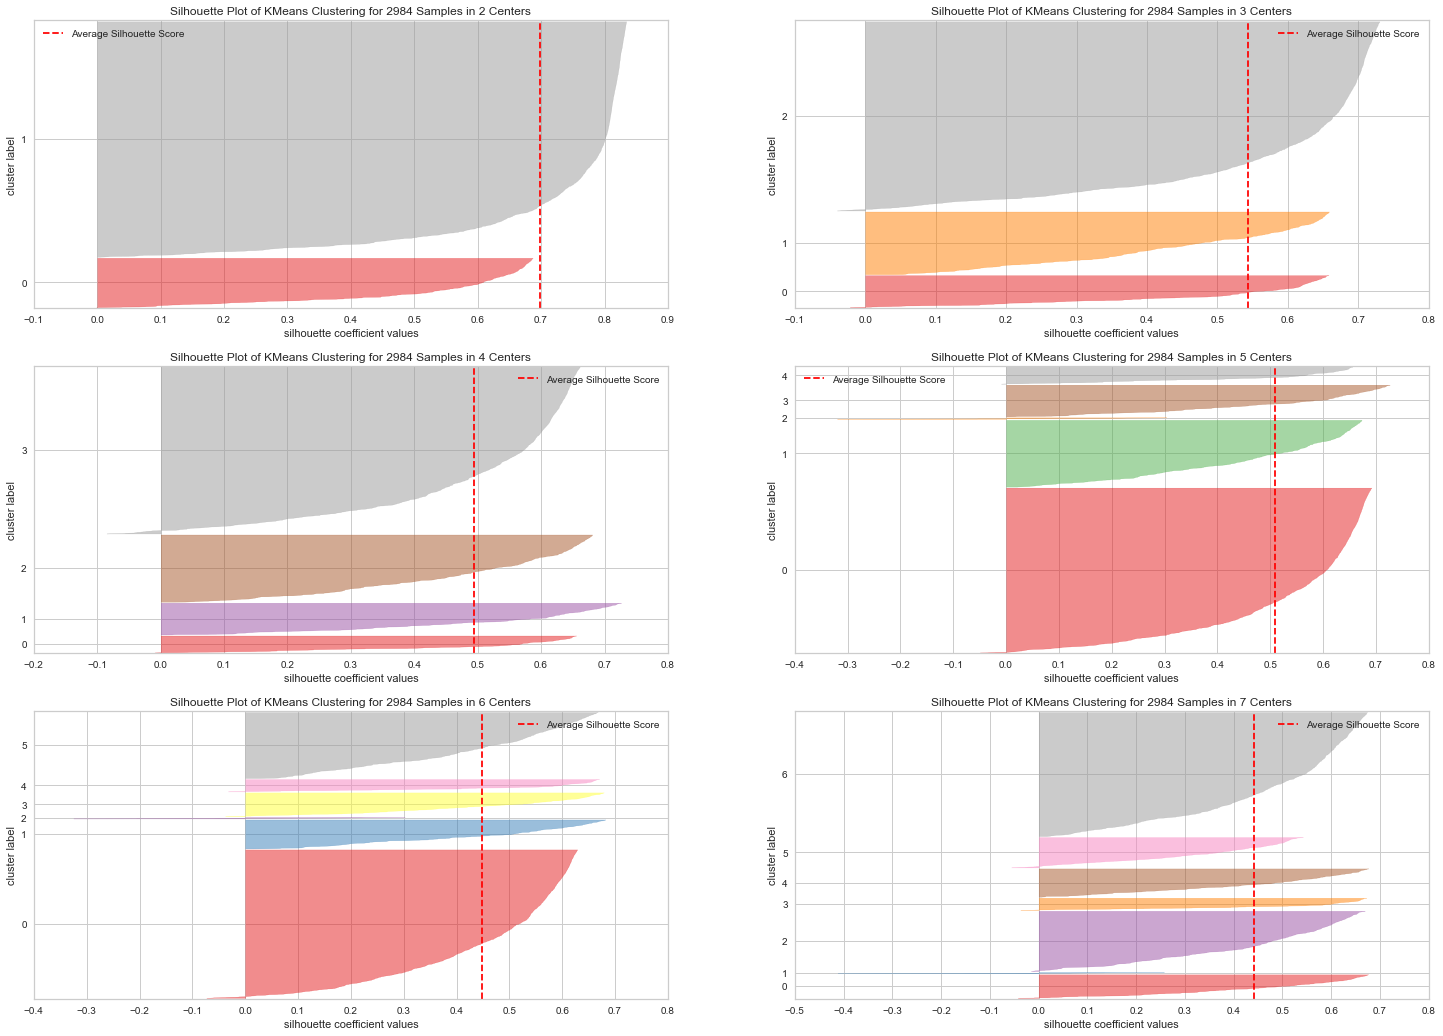

In [348]:
fig, ax = plt.subplots(3,2, figsize=(25, 18))
for k in clusters:
    km = cl.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod (k, 2)
    
    visualizer = SilhouetteVisualizer(km, color= 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize()

# <font color='red'> 9.0. Model Training </font>

## 9.1. K-Means

In [374]:
# Model Definition
k = 3
kmeans = cl.KMeans(init='random',n_clusters=k, n_init=10, max_iter=300, random_state=42)

#model training
kmeans.fit(X)

#clustering
labels = kmeans.labels_

## 9.2. Cluster Validation

In [375]:
# WSS
print(f'WSS values: {kmeans.inertia_}')
print(f"SS value: {m.silhouette_score(X, labels, metric='euclidean')}")

WSS values: 33.03546849034036
SS value: 0.5430157741042767


# <font color='red'> 10.0. Cluster Analysis </font>

In [376]:
df10 = df4[cols_select].copy()
df10['cluster'] = labels
df10.head()

,customer_id,gross_revenue,recency_days,qtde_produto,frequency,qtde_returns,cluster
0,17850,5391.21,372.0,21.0,17.000000,40.0,0
1,13047,3237.54,31.0,106.0,0.029155,36.0,2
2,12583,7281.38,2.0,115.0,0.040323,51.0,2
3,13748,948.25,95.0,24.0,0.017921,0.0,1
4,15100,876.00,333.0,1.0,0.073171,22.0,0


## 10.1. Visualization Inspection

In [ ]:
#fig = px.scatter_3d(df10, x= 'recency_days', y='invoice_no', z='gross_revenue', color='cluster')
#fig.show()

## 10.1. Visualization Inspection

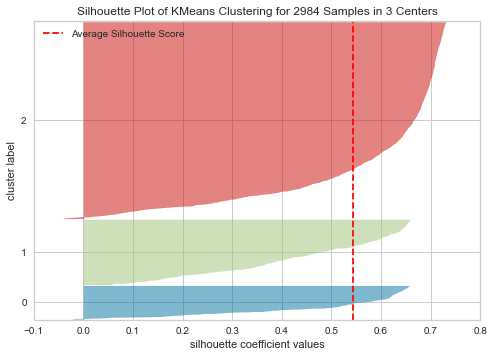

In [377]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

## 10.2. 2d plot

In [378]:
df_viz = df10.copy()
#sns.pairplot(df_viz, hue='cluster')

## 10.3. UMAP - t-SNE

In [379]:
from sklearn.decomposition import PCA


In [380]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [381]:
embedding=pca.fit_transform(X)
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

In [382]:
df_viz

,customer_id,gross_revenue,recency_days,qtde_produto,frequency,qtde_returns,cluster,embedding_x,embedding_y
0,17850,5391.21,372.0,21.0,17.000000,40.0,0,0.857830,0.042812
1,13047,3237.54,31.0,106.0,0.029155,36.0,2,-0.090800,0.007348
2,12583,7281.38,2.0,115.0,0.040323,51.0,2,-0.168948,0.012125
3,13748,948.25,95.0,24.0,0.017921,0.0,1,0.083722,-0.024775
4,15100,876.00,333.0,1.0,0.073171,22.0,0,0.720577,0.012182
...,...,...,...,...,...,...,...,...,...
5839,12479,527.20,11.0,31.0,1.000000,34.0,2,-0.138951,-0.037853
5860,14126,706.13,7.0,14.0,0.750000,50.0,2,-0.149460,-0.046685
5866,13521,1093.65,1.0,313.0,0.300000,0.0,2,-0.178749,0.101192
5876,15060,303.09,8.0,81.0,2.000000,0.0,2,-0.146977,-0.014077


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

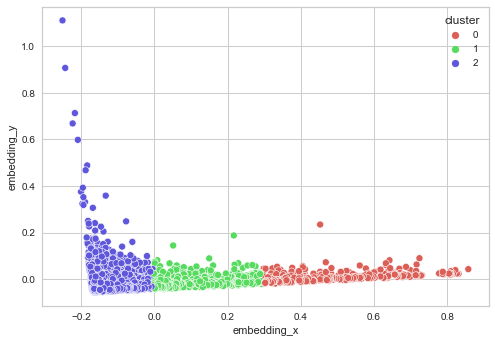

In [383]:
#reducer = UMAP(random_state=42)
#embedding = reducer.fit_transform(x)

#embedding
#df_viz['embedding_x'] = embedding[:,0]
#df_viz['embedding_y'] = embedding[:,1]

#plot UMAP

sns.scatterplot(x='embedding_x', y='embedding_y', 
                hue='cluster', 
                palette=sns.color_palette('hls', n_colors=len(df_viz['cluster'].unique())), 
                data = df_viz)

<AxesSubplot:xlabel='embedding_x2', ylabel='embedding_y2'>

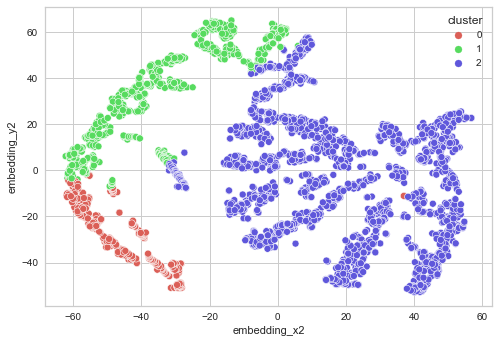

In [384]:
from sklearn.manifold import TSNE



tsne = TSNE(n_components=2, random_state=42)
embedding = tsne.fit_transform(X )
df_viz['embedding_x2'] = embedding[:,0]
df_viz['embedding_y2'] = embedding[:,1]
sns.scatterplot(x='embedding_x2', y='embedding_y2', 
                hue='cluster', 
                palette=sns.color_palette('hls', n_colors=len(df_viz['cluster'].unique())), 
                data = df_viz)

## 10.2. Cluster Profile

In [385]:
df10.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'qtde_produto',
       'frequency', 'qtde_returns', 'cluster'],
      dtype='object')

In [386]:
# Number of Cluster
df_cluster = df10[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100* (df_cluster['customer_id'] / df_cluster['customer_id'].sum()).round(4)

# AVG Gross Revenue
df_avg_gross = df10[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index().round(4)
df_cluster = pd.merge(df_cluster, df_avg_gross, how='inner', on='cluster')

#AVG recency days
df_recency = df10[['recency_days', 'cluster']].groupby('cluster').mean().reset_index().round(4)
df_cluster = pd.merge(df_cluster, df_recency, how='inner', on='cluster')

#qtde_product
qtde_product = df10[['qtde_produto', 'cluster']].groupby('cluster').mean().reset_index().round(4)
df_cluster = pd.merge(df_cluster, qtde_product, how='inner', on='cluster')

#frequency
frequency = df10[['frequency', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, frequency, how='inner', on='cluster')


#returns
returns = df10[['qtde_returns', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, returns, how='inner', on='cluster')

In [387]:
df_cluster.head()

,cluster,customer_id,perc_customer,gross_revenue,recency_days,qtde_produto,frequency,qtde_returns
0,0,337,11.29,857.3740,245.8398,32.1573,0.411758,51.744807
1,1,659,22.08,1219.3885,102.4659,49.7344,0.118966,10.682853
2,2,1988,66.62,3543.5571,21.1665,96.9401,0.064733,41.900905


## Cluster 01 : (Candidato a Insider)
    - Número de customers :6 (0.14% do customers)
    - Recência em média :  7 dias
    - Compras em média :  89 compras
    - Receita em média : $182.182,00 dolares

## Cluster 01 : (Candidato a Insider)
    - Número de customers : 31 (0.7% do customers)
    - Recência em média : 14 dias
    - Compras em média : 53 compras
    - Receita em média : $40.543,52 dolares
    
## Cluster 01 : (Candidato a Insider)
    - Número de customers : 4.335 (99% do customers)
    - Recência em média : 92 dias
    - Compras em média : 5 compras
    - Receita em média : $ 1.372,57 dolares